<a href="https://colab.research.google.com/github/LokeshJatangi/EVA-vision/blob/master/Project%204/Assignment%204B/Code-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Batch Normalization  

In this second version of code , to reduce the gap between the Training and Test accuracies following are added :
 
   **1) Batch Normalization is added after each Convolution layer**  
   **2) Batch sizes are varied to determine the best batch size for the Network**


In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


(60000, 28, 28)


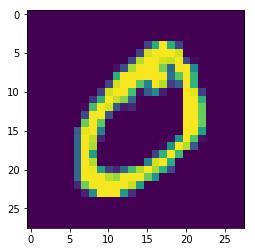

In [3]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [7]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [8]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())

model.add(Convolution2D(10, 3, 3, activation='relu')) #24
model.add(BatchNormalization())

model.add(Convolution2D(30, 3, 3, activation='relu'))#22
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))#11
model.add(Convolution2D(10, 1, 1, activation='relu')) #11
model.add(BatchNormalization())

model.add(Convolution2D(10, 3, 3, activation='relu'))#9
model.add(BatchNormalization())

model.add(Convolution2D(18, 3, 3, activation='relu'))#7
model.add(BatchNormalization())

model.add(Convolution2D(30, 3, 3, activation='relu'))#5
model.add(BatchNormalization())

model.add(Convolution2D(10, 1, activation='relu')) #5
model.add(BatchNormalization())

model.add(Convolution2D(10, 5, 5))

model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(30, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipyker

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 10)        910       
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 10)        40        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 30)        2730      
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 30)        120       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 30)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (5, 5))`


In [9]:
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=512, nb_epoch=20, verbose=1, validation_data=(X_test, Y_test), )

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.6140 - acc: 0.8141 - val_loss: 0.1790 - val_acc: 0.9466
Epoch 2/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.1103 - acc: 0.9688 - val_loss: 0.0833 - val_acc: 0.9748
Epoch 3/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0667 - acc: 0.9803 - val_loss: 0.0578 - val_acc: 0.9833
Epoch 4/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0492 - acc: 0.9853 - val_loss: 0.0543 - val_acc: 0.9838
Epoch 5/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0396 - acc: 0.9883 - val_loss: 0.0383 - val_acc: 0.9891
Epoch 6/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.0315 - acc: 0.9908 - val_loss: 0.0359 - val_acc: 0.9892
Epoch 7/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0279 - acc: 0.9919 - val_loss: 0.0393 - val_acc

In [10]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03666019286025985, 0.9903]


After adding the Batch Normalization ,
 
1)  The highest Validation accuracy is increased slightly to 99.17% and corresponding training            accuracy is 99.70% , still the  gap between the Training and Validatio accuracy is more than the previous version of code .

2) The training accuracy is increased to 99.92 in 20th epoch.
 
 3) Earlier(Code - 1) the difference was 0.5%,
 In this code after adding batch Normalization and changing the batch size to 512 ,the difference is approximately 0.6% for highest validation accuracy obtained.